In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import time
from argparse import Namespace

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

from src.plotting_utils import GREG_PALLETTE

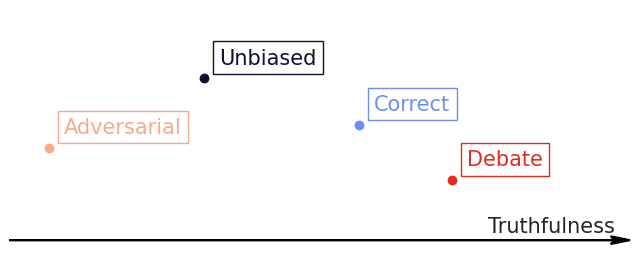

In [100]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)

# Unbiased
# Correct Explanation
# Adversarial Explanation
# All explanations
# Debate across explanation

colors = [GREG_PALLETTE[i] for i in [0, 4, 8, 12]]

ax.set_xlim([0.2, 1])
ax.set_ylim([0, 1])

# removing the default axis on all sides:
for side in ["bottom", "right", "top", "left"]:
    ax.spines[side].set_visible(False)

# removing the axis ticks
ax.set_xticks([])  # labels
ax.set_yticks([])
ax.xaxis.set_ticks_position("none")  # tick markers
ax.yaxis.set_ticks_position("none")

dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# # manual arrowhead width and length
hw = 1.0 / 30.0
hl = 1.0 / 40.0
lw = 1.5  # axis line width
ohg = 0.2  # arrow overhang

# # compute matching arrowhead length and width
yhw = hw * height / width
yhl = hl * width / height

points = [(0.45, 0.7), (0.65, 0.5), (0.25, 0.4), (0.77, 0.26)]
texts = ["Unbiased", "Correct", "Adversarial", "Debate"]

for i, (point, text) in enumerate(zip(points, texts)):
    ax.scatter(*point, s=50, color=colors[i], edgecolor="k", zorder=10, linewidths=0)
    ax.text(
        point[0] + 0.02,
        point[1] + 0.09,
        text,
        fontsize=15,
        va="center",
        color=colors[i],
        bbox=dict(boxstyle="square", ec=colors[i], fc="white"),
    )

# # # draw x and y axis
ax.arrow(
    0.2,
    0.0,
    0.8,
    0.0,
    fc="k",
    ec="k",
    lw=lw,
    head_width=hw,
    head_length=hl,
    overhang=ohg,
    length_includes_head=True,
    clip_on=False,
)
ax.text(0.98, 0.06, "Truthfulness", ha="right", va="center", fontsize=15)
# plt.tight_layout()
plt.savefig("figures/modes_of_oversight.pdf", bbox_inches="tight")
plt.show()